In [1]:
from neural_viz import *
import torch
from fastai.vision import open_image
import cv2

In [2]:
model = torch.load('models/cats_vs_dogs_iter_3900')
model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16): M

In [3]:
x = open_image('data/test.jpg').resize(224).data
x.shape

torch.Size([3, 224, 224])

### GradCam

In [4]:
img, heatmap, saliency_map = grad_cam_viz(model, ['0', '0', '28'], x.cuda(), torch.tensor(0, dtype=torch.long))

Loss = 10.535276412963867
activations * alpha = 2.576744794845581


/home/prasannals/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2404: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [5]:
cv2.imwrite('0nviz_testimg.jpg', img)
cv2.imwrite('0nviz_testheatmap.jpg', heatmap)

True

In [6]:
img, heatmap, saliency_map = grad_cam_viz(model, ['0', '0', '28'], x.cuda(), torch.tensor(1, dtype=torch.long))

Loss = -12.348814010620117
activations * alpha = -3.1153697967529297


In [7]:
cv2.imwrite('1nviz_testimg.jpg', img)
cv2.imwrite('1nviz_testheatmap.jpg', heatmap)

True

### GradCam Pos Neg Viz

In [8]:
img, heatmap, saliency_map = grad_cam_no_relu_viz(model, ['0', '0', '28'], x.cuda(), torch.tensor(1, dtype=torch.long).cuda())

Loss = -12.348814010620117
activations * alpha = -3.1153697967529297


In [9]:
cv2.imwrite('1nviz_testimg_pos.jpg', img[0])
cv2.imwrite('1nviz_testheatmap_pos.jpg', heatmap[0])
cv2.imwrite('1nviz_testimg_neg.jpg', img[1])
cv2.imwrite('1nviz_testheatmap_neg.jpg', heatmap[1])

True

In [10]:
img, heatmap, saliency_map = grad_cam_no_relu_viz(model, ['0', '0', '28'], x.cuda(), torch.tensor(0, dtype=torch.long).cuda())

Loss = 10.535276412963867
activations * alpha = 2.576744794845581


In [11]:
cv2.imwrite('0nviz_testimg_pos.jpg', img[0])
cv2.imwrite('0nviz_testheatmap_pos.jpg', heatmap[0])
cv2.imwrite('0nviz_testimg_neg.jpg', img[1])
cv2.imwrite('0nviz_testheatmap_neg.jpg', heatmap[1])

True

### Contribution Cam

In [12]:
img, heatmap, saliency_map = contribution_cam_viz(model, ['0', '0', '28'], x.cuda(), torch.tensor(0, dtype=torch.long).cuda())

Loss = 10.535276412963867
activations * alpha = 10.529779434204102


In [13]:
cv2.imwrite('0nviz_cbc_img.jpg', img)
cv2.imwrite('0nviz_cbc_heatmap.jpg', heatmap)

True

In [14]:
img, heatmap, saliency_map = contribution_cam_viz(model, ['0', '0', '28'], x.cuda(), torch.tensor(1, dtype=torch.long).cuda())

Loss = -12.348814010620117
activations * alpha = -12.343703269958496


In [15]:
cv2.imwrite('1nviz_cbc_img.jpg', img)
cv2.imwrite('1nviz_cbc_heatmap.jpg', heatmap)

True

### Contribution Cam Pos Neg Viz

In [16]:
img, heatmap, saliency_map = grad_cam_no_relu_viz(model, ['0', '0', '28'], x.cuda(), torch.tensor(1, dtype=torch.long).cuda())

Loss = -12.348814010620117
activations * alpha = -3.1153697967529297


In [17]:
cv2.imwrite('1nviz_cbc_testimg_pos.jpg', img[0])
cv2.imwrite('1nviz_cbc_testheatmap_pos.jpg', heatmap[0])
cv2.imwrite('1nviz_cbc_testimg_neg.jpg', img[1])
cv2.imwrite('1nviz_cbc_testheatmap_neg.jpg', heatmap[1])

True

In [18]:
img, heatmap, saliency_map = grad_cam_no_relu_viz(model, ['0', '0', '28'], x.cuda(), torch.tensor(0, dtype=torch.long).cuda())

Loss = 10.535276412963867
activations * alpha = 2.576744794845581


In [19]:
cv2.imwrite('0nviz_cbc_testimg_pos.jpg', img[0])
cv2.imwrite('0nviz_cbc_testheatmap_pos.jpg', heatmap[0])
cv2.imwrite('0nviz_cbc_testimg_neg.jpg', img[1])
cv2.imwrite('0nviz_cbc_testheatmap_neg.jpg', heatmap[1])

True

### Saliency Confusion Matrix

Loss = 10.535276412963867
activations * alpha = 2.576744794845581
Loss = 10.535276412963867
activations * alpha = 2.576744794845581


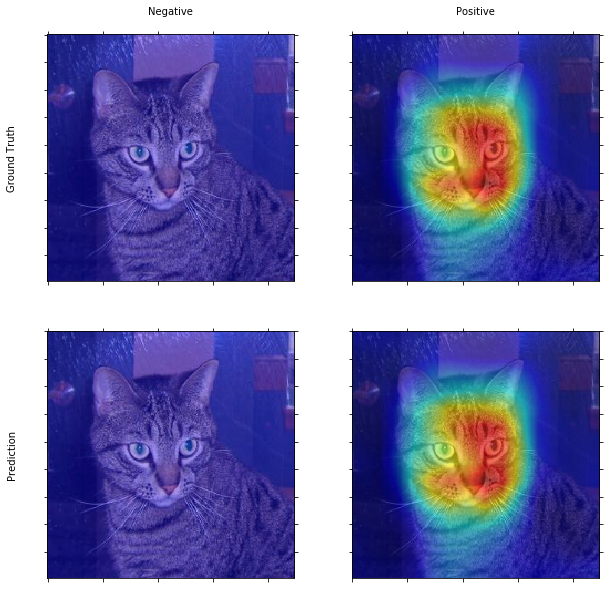

In [20]:
fig = grad_cam_saliency_confusion_map(model, ['0', '0', '28'], x.cuda(), torch.tensor(0, dtype=torch.long).cuda())

Loss = 10.535276412963867
activations * alpha = 2.576744794845581
Loss = 10.535276412963867
activations * alpha = 2.576744794845581


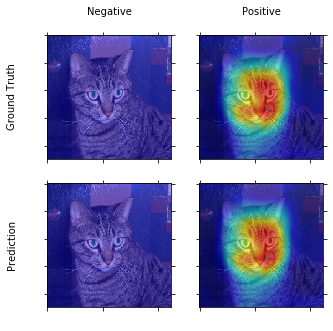

In [21]:
fig = grad_cam_saliency_confusion_map(model, ['0', '0', '28'], x.cuda(), 
                    torch.tensor(0, dtype=torch.long).cuda(), figsize=(5,5))